# Task 1.2: Prediction with LSTM

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(102)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "prediction",

    # Model config
    "model": "LSTM",
    "hidden_dim": 50,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 500,
    "lr": 1e-3,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
#config.save("default_pred_lstm")

### Load saved config

In [4]:
config = load_train_config("config_default_pred_lstm")
print(config)

Config loaded from: config/config_default_pred_lstm.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 1
  hidden_dim: 50
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 300
  lr: 0.001
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x, y, splits, indices = get_data(config, return_index=True)
x_train, x_val, x_test, y_train, y_val, y_test = splits
train_idx, test_idx, val_idx = indices

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 134.55721, val loss: 667.81061
  Epoch: 50,  train loss: 37.65789, val loss: 384.37177
  Epoch: 100,  train loss: 24.84743, val loss: 66.64327
  Epoch: 150,  train loss: 17.40075, val loss: 49.78057
  Epoch: 200,  train loss: 14.98980, val loss: 47.94177
  Epoch: 250,  train loss: 15.16937, val loss: 47.08672
  Epoch: 300,  train loss: 24.47117, val loss: 47.28322
  Needed 0.87 minutes for training


NOTE: Execution time of LSTM a bit longer than of RNN!

### Analysis

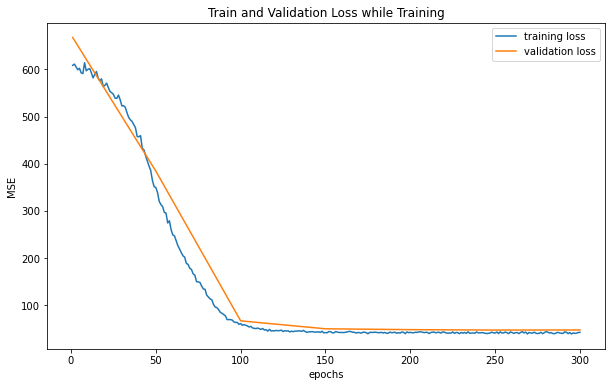

In [7]:
fl.plot_training_loss()

In [8]:
y_pred = fl.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.161303520202637
  Model Test MSE:       47.47444152832031
  Model Test RMSE:      6.890170097351074


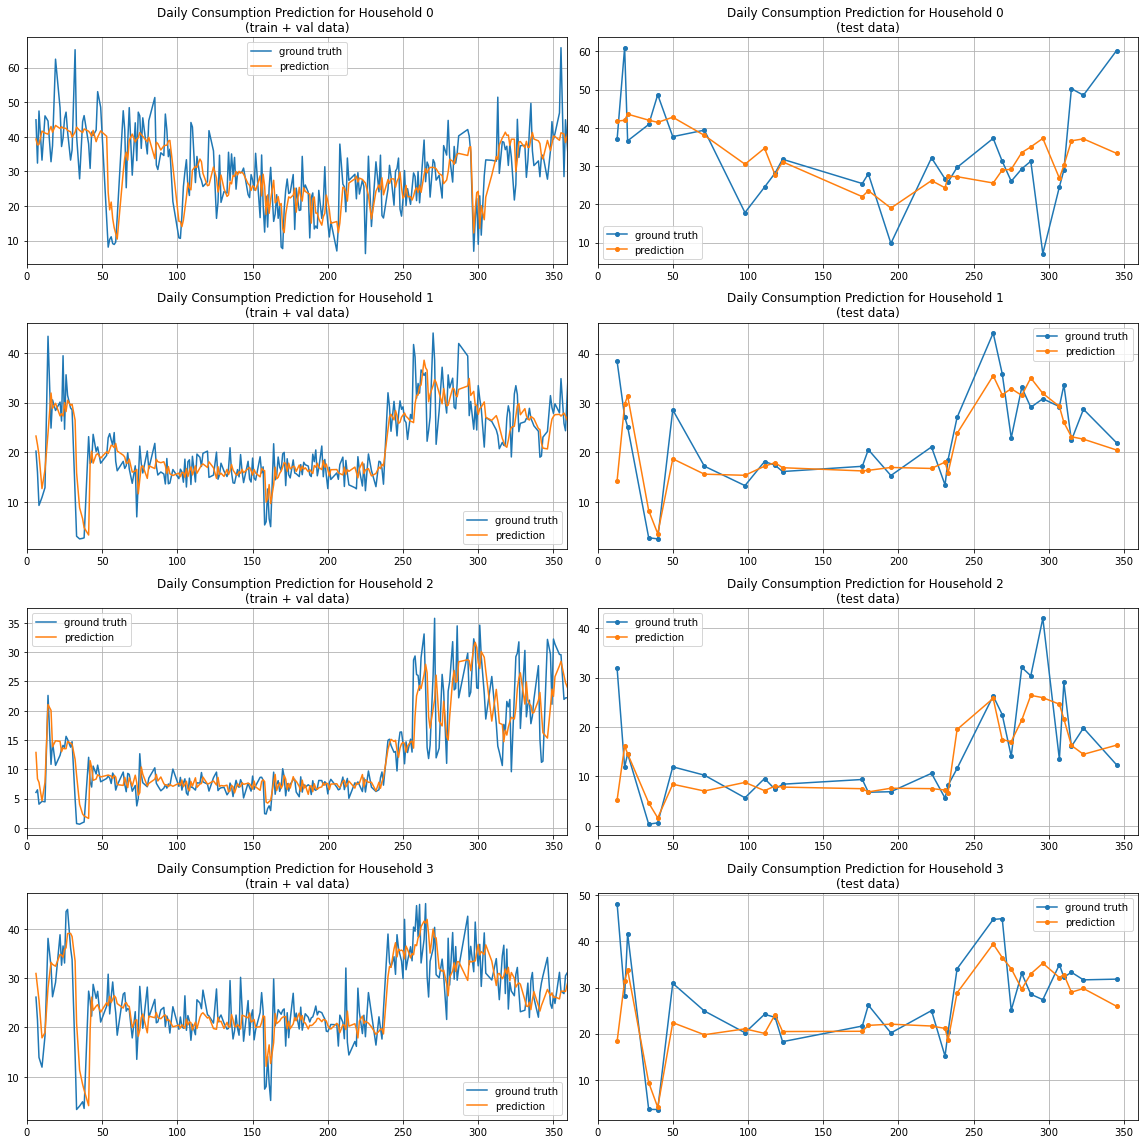

In [9]:
fl.plot_prediction_vs_label(x, y, train_idx, test_idx, val_idx, households=range(4))

## Run training with aggregated data

In [10]:
x, y, splits, indices = get_data(config, return_index=True)
x_train, x_val, x_test, y_train, y_val, y_test = splits
train_idx, test_idx, val_idx = indices

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [11]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 564.18634, val loss: 660.99170
  Epoch: 50,  train loss: 277.83960, val loss: 264.88007
  Epoch: 100,  train loss: 43.68821, val loss: 62.41563
  Epoch: 150,  train loss: 32.46758, val loss: 51.60116
  Epoch: 200,  train loss: 43.14628, val loss: 49.73253
  Epoch: 250,  train loss: 35.93864, val loss: 49.52540
  Epoch: 300,  train loss: 40.10517, val loss: 49.32387
  Needed 0.03 minutes for training


### Analysis

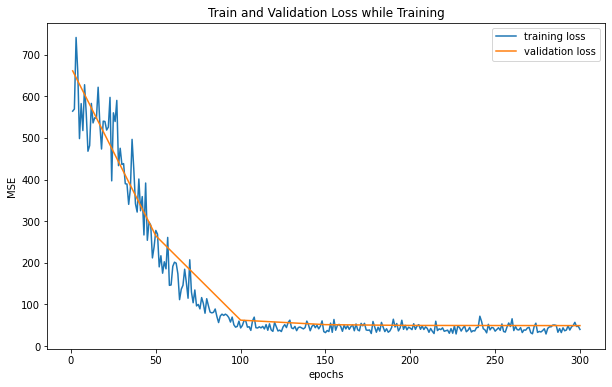

In [12]:
fl_agg.plot_training_loss()

In [20]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.161303520202637
  Model Test MSE:       47.80546951293945
  Model Test RMSE:      6.914150238037109


tensor([[19.8761],
        [41.1655],
        [35.0309],
        ...,
        [ 6.0473],
        [ 5.8863],
        [ 2.9432]])

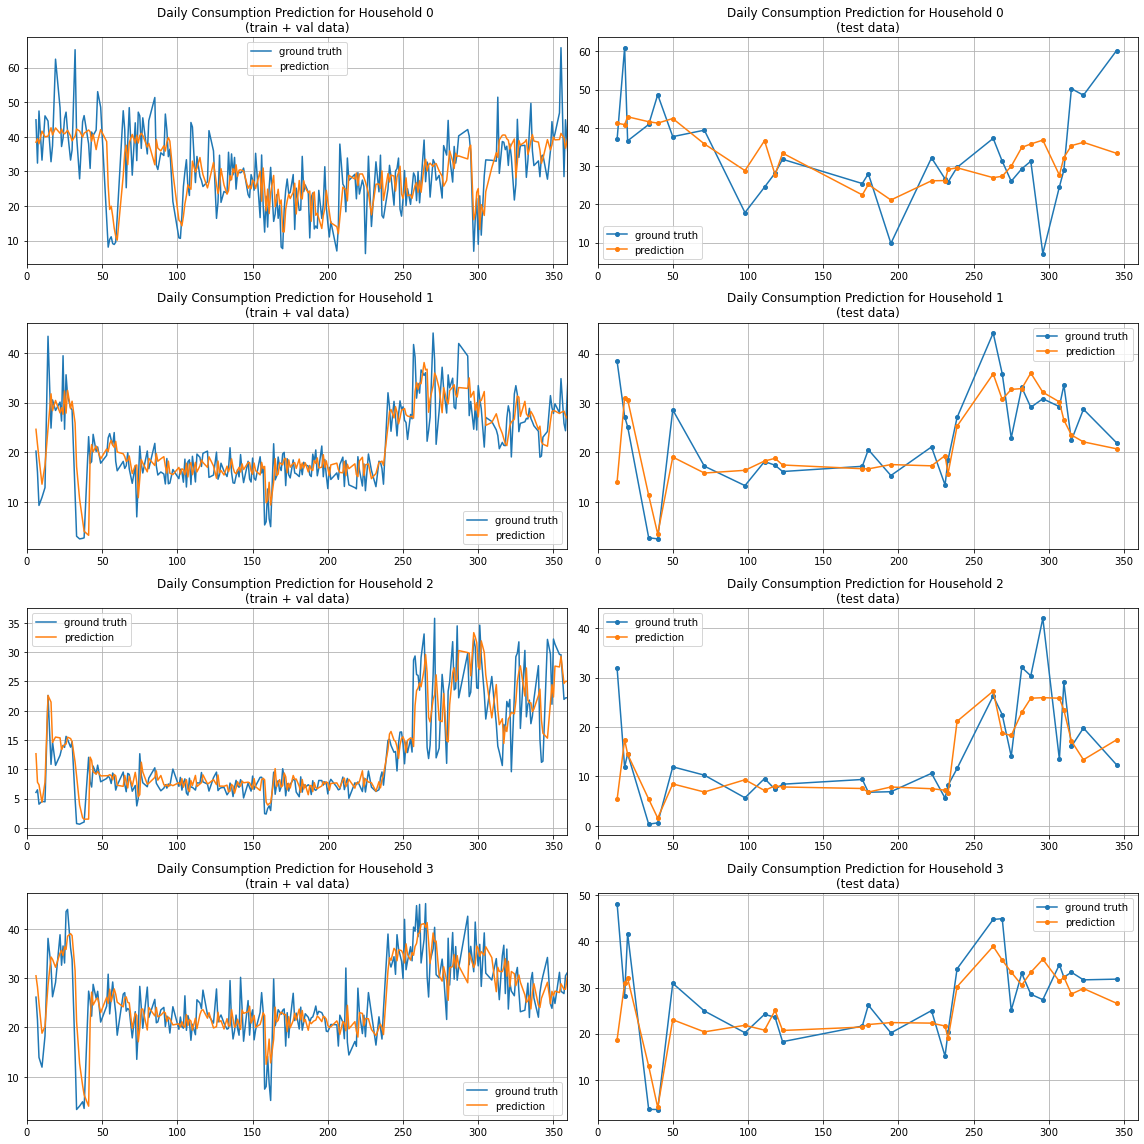

In [14]:
fl_agg.plot_prediction_vs_label(x, y, train_idx, test_idx, val_idx, households=range(4))